# **12차시: 스케일링**
## 🔍 **학습목표**
- 머신러닝 모델 성능에 영향을 미치는 변수 간 단위 차이를 이해한다.  
- 다양한 스케일링 기법(Standard, MinMax, Robust)의 차이를 설명할 수 있다.  

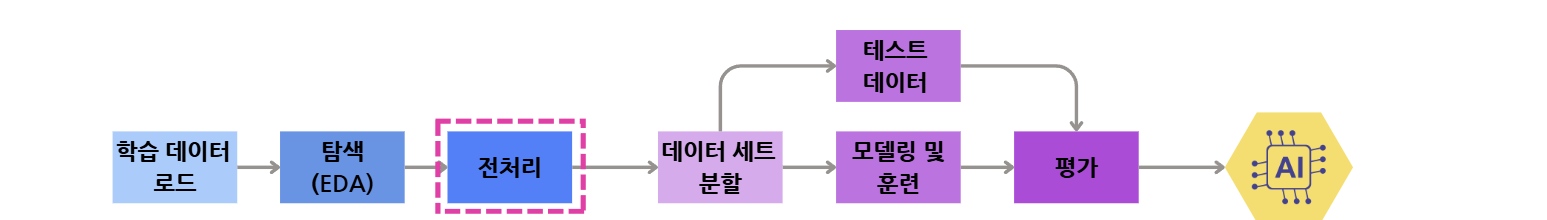

---

In [1]:
# 미니 데이터 생성
import pandas as pd

df = pd.DataFrame({
    'salary': [3000.0, 3250.5, 3420.8, 3600.2, 3800.7, 8000.0],  # 연봉
    'age': [25.1, 27.3, 29.2, 31.4, 33.0, 35.6],
    'tenure': [1.2, 2.8, 3.4, 4.0, 4.3, 10.6],  # 근속연수
    'health_index': [0.82, 0.78, 0.80, 0.76, 0.77, 0.81]  # 건강지수
})
df

,salary,age,tenure,health_index
0,3000.0,25.1,1.2,0.82
1,3250.5,27.3,2.8,0.78
2,3420.8,29.2,3.4,0.80
3,3600.2,31.4,4.0,0.76
4,3800.7,33.0,4.3,0.77
5,8000.0,35.6,10.6,0.81


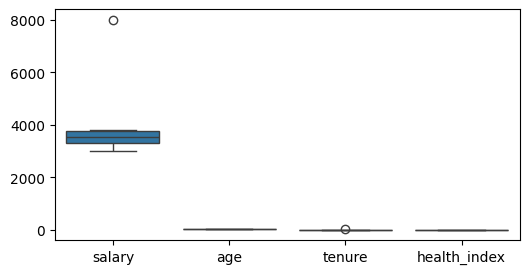

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.boxplot(data=df)
plt.show()


## **📌 핵심 이론 정리**


## **1. 왜 스케일링이 필요할까?**
- salary는 천 단위, health_index는 0~1 사이
- 숫자의 크기만 다를 뿐인데, 모델은 큰 값에 더 많은 중요도를 부여할 수 있음




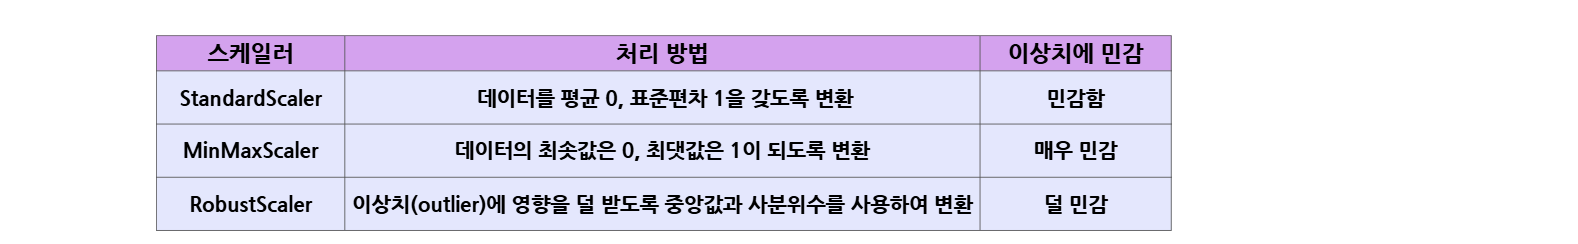

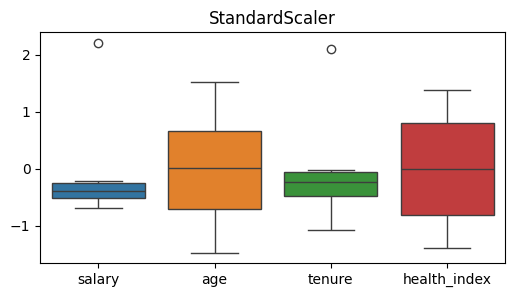

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

plt.figure(figsize=(6, 3))
sns.boxplot(data=scaled_df)
plt.title("StandardScaler")
plt.show()

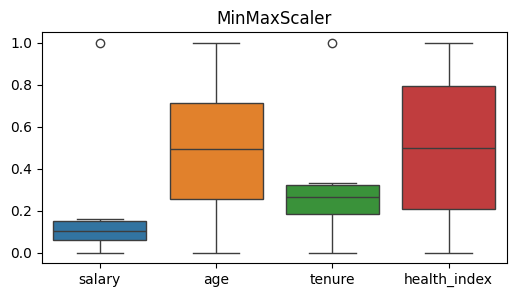

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
scaled = mm.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

plt.figure(figsize=(6, 3))
sns.boxplot(data=scaled_df)
plt.title("MinMaxScaler")
plt.show()

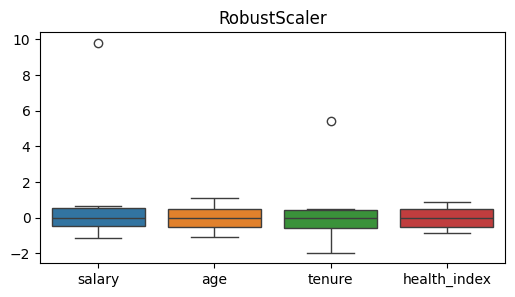

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
scaled = rs.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

plt.figure(figsize=(6, 3))
sns.boxplot(data=scaled_df)
plt.title("RobustScaler")
plt.show()

> **이상치가 있는 데이터에는 RobustScaler가 가장 안정적이며,
시각화(Boxplot)를 통해 이를 쉽게 확인할 수 있다.**

---

## **연습 문제**


### **문제 1. 다음 조건에 따라 연속형 변수에 대해 스케일링을 적용하시오.**

- (1) 데이터셋: `jajang_price.csv`
- (2) 대상 컬럼: 'cpi', 'minimum_wage', 'coupon_discount', 'price'
- (3) **정규화(0~1 사이로 변환)**를 사용하여 스케일링하시오. (`MinMaxScaler`)
- (4) `fit_transform()`을 사용하여 적용할 것
- (5) 결과는 `df_scaled_mm` 변수에 저장하시오.
- (6) 결과는 데이터프레임 형태로 출력하시오.



In [10]:
# 여기에 코드를 작성하세요.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()

df = pd.read_csv('데이터세트/jajang_price.csv')
cols=['cpi', 'minimum_wage', 'coupon_discount', 'price']

msDF = ms.fit_transform(df[cols])

df_scaled_mm=pd.DataFrame(msDF,columns=cols)
df_scaled_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cpi              8000 non-null   float64
 1   minimum_wage     8000 non-null   float64
 2   coupon_discount  8000 non-null   float64
 3   price            8000 non-null   float64
dtypes: float64(4)
memory usage: 250.1 KB


## **도전 문제**

### **문제 1. 다음 조건에 따라 RobustScaler를 적용하고 결과를 비교하시오.**

(1) 위 연습문제와 동일한 컬럼('cpi', 'minimum_wage', 'coupon_discount', 'price')에 대해 **RobustScaler**를 적용하시오.

(2) 스케일링된 데이터프레임은 `df_scaled_robust`라는 변수에 저장하시오.

(3) 위의 연습문제에서 적용한 `MinMaxScaler`의 결과와 `RobustScaler`의 결과를 **boxplot**으로 나란히 그려 비교하시오.
- plt.figure(figsize=(16, 6)) 가로,세로 비율 설정
- plt.subplot()을 사용하여 1행,2열로 화면 구성



<Axes: >

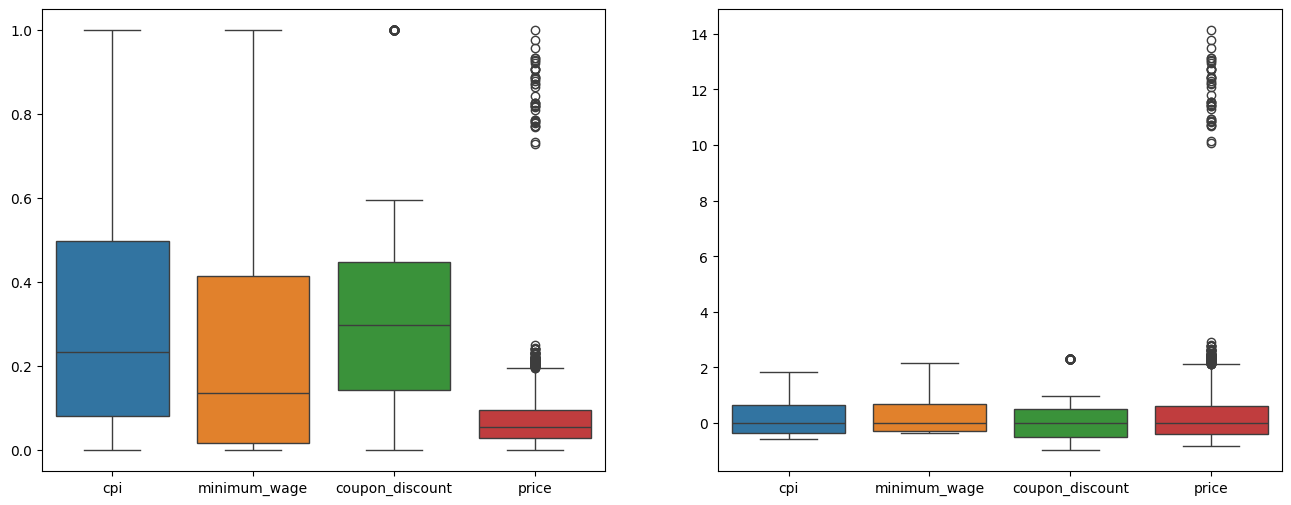

In [12]:
# 여기에 코드를 작성하세요
from sklearn.preprocessing import RobustScaler

rs=RobustScaler()
rsDF=rs.fit_transform(df[cols])

df_scaled_robust=pd.DataFrame(rsDF,columns=cols)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df_scaled_mm)
plt.subplot(1,2,2)
sns.boxplot(df_scaled_robust)

### **문제 2. 아래 중 RobustScaler의 장점에 대한 설명으로 가장 적절한 것을 `답안02`에 저장하시오.**

1.  평균과 표준편차로 스케일링하여 이상치를 잘 반영한다.
2.  최댓값과 최솟값 사이로 정규화되어 항상 0~1 사이가 된다.
3.  이상치가 있어도 영향을 적게 받아 데이터 분포를 잘 보존한다.
4.  중복값이 많을수록 RobustScaler는 정확하지 않다.

In [ ]:
# 여기에 코드를 작성하세요